# Breast Cancer Diagnosis Using k-Nearest Neighbors (k-NN) Classification
This project focuses on developing a machine learning model to predict whether a breast tumor is benign or malignant using the k-Nearest Neighbors (k-NN) algorithm. The model is built and evaluated on the Breast Cancer Wisconsin dataset, leveraging a series of preprocessing techniques, including feature scaling, dimensionality reduction through PCA, and addressing class imbalance with SMOTE. The goal is to create a reliable diagnostic tool that can assist in early detection and treatment of breast cancer.

## About the Dataset 
The Breast Cancer Wisconsin dataset is a well-known dataset in the machine learning community, widely used for binary classification tasks. It was originally created by Dr. William H. Wolberg from the University of Wisconsin, and it contains 569 samples of breast tumor data. Each sample is described by 30 numerical features, which are computed from digitized images of fine needle aspirate (FNA) of breast mass. These features represent characteristics of the cell nuclei present in the image, such as radius, texture, perimeter, area, smoothness, and more.

The dataset is balanced, with approximately 63% benign cases and 37% malignant cases. The binary target variable indicates whether the tumor is benign (0) or malignant (1). The dataset is often used to train models that can assist in the early detection of breast cancer, potentially improving patient outcomes through timely intervention.

Source: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data

## Data Dictionary
| **Column Name**            | **Data Type** | **Description**                                                                 |
|----------------------------|---------------|---------------------------------------------------------------------------------|
| `diagnosis`                | Categorical   | Target variable indicating the diagnosis of the tumor: 0 = Benign, 1 = Malignant |
| `radius_mean`              | Float         | Mean of distances from center to points on the perimeter of the nuclei          |
| `texture_mean`             | Float         | Standard deviation of gray-scale values of the nuclei                           |
| `perimeter_mean`           | Float         | Mean size of the core perimeter of the nuclei                                   |
| `area_mean`                | Float         | Mean area of the nuclei                                                         |
| `smoothness_mean`          | Float         | Mean of local variation in radius lengths                                       |
| `compactness_mean`         | Float         | Mean of (perimeter^2 / area - 1.0), describing the compactness of the nuclei    |
| `concavity_mean`           | Float         | Mean of the severity of concave portions of the contour                         |
| `concave points_mean`      | Float         | Mean number of concave portions of the contour                                  |
| `symmetry_mean`            | Float         | Mean symmetry of the nuclei                                                     |
| `fractal_dimension_mean`   | Float         | Mean "coastline approximation" of the nuclei - 1D measure of complexity         |
| `radius_se`                | Float         | Standard error of the radius feature                                            |
| `texture_se`               | Float         | Standard error of the texture feature                                           |
| `perimeter_se`             | Float         | Standard error of the perimeter feature                                         |
| `area_se`                  | Float         | Standard error of the area feature                                              |
| `smoothness_se`            | Float         | Standard error of the smoothness feature                                        |
| `compactness_se`           | Float         | Standard error of the compactness feature                                       |
| `concavity_se`             | Float         | Standard error of the concavity feature                                         |
| `concave points_se`        | Float         | Standard error of the concave points feature                                    |
| `symmetry_se`              | Float         | Standard error of the symmetry feature                                          |
| `fractal_dimension_se`     | Float         | Standard error of the fractal dimension feature                                 |
| `radius_worst`             | Float         | Largest mean value of the radius feature                                        |
| `texture_worst`            | Float         | Largest mean value of the texture feature                                       |
| `perimeter_worst`          | Float         | Largest mean value of the perimeter feature                                     |
| `area_worst`               | Float         | Largest mean value of the area feature                                          |
| `smoothness_worst`         | Float         | Largest mean value of the smoothness feature                                    |
| `compactness_worst`        | Float         | Largest mean value of the compactness feature                                   |
| `concavity_worst`          | Float         | Largest mean value of the concavity feature                                     |
| `concave points_worst`     | Float         | Largest mean value of the concave points feature                                |
| `symmetry_worst`           | Float         | Largest mean value of the symmetry feature                                      |
| `fractal_dimension_worst`  | Float         | Largest mean value of the fractal dimension feature                             |

### Notes:
- **Mean Features**: The `_mean` features represent the average values calculated across the nucleus for each respective characteristic.
- **SE Features**: The `_se` features represent the standard error, providing a measure of uncertainty in the mean values.
- **Worst Features**: The `_worst` features represent the maximum (worst) values observed for each characteristic, which can provide additional insight into the most extreme cases.

## Notebook Sections
The notebook is divided into 7 parts.
1. **Data Prep:** Load and clean the dataset for analysis.
2. **EDA:** Explore data patterns, distributions, and potential issues.
3. **Preprocessing:** Scale features, reduce dimensionality, and balance classes.
4. **Data Splitting:** Split data into training and testing sets.
5. **Model Building:** Train and tune a k-NN model on the training data.
6. **Model Evaluation:** Assess model performance with key metrics.
7. **Conclusion:** Summarize findings and provide final recommendations.

# 1. Data Prep

## Data Inspection

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
file_path = '../Data/breast_cancer_wisconsin_dataset.csv'
data = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset to get an overview of the data
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Check the shape of the DataFrame (number of rows and columns)
data.shape

(569, 33)

In [5]:
# Display information about the DataFrame, including column types and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# Generate descriptive statistics for the DataFrame, to understand data distribution
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### Notes
-  The dataset consists of 569 rows and 33 columns.
-  The columns include an id column, a diagnosis column (target variable), and 30 feature columns, along with one column labeled "Unnamed: 32," which contains only null values.
-  The dataset contains numeric data types for all features except for the diagnosis column, which is an object (categorical).
-  The Unnamed: 32 column is entirely empty and should be dropped in the data cleaning phase.

## Data Cleaning

In [7]:
# Drop the 'Unnamed: 32' column
data_cleaned = data.drop(columns=['Unnamed: 32'])

In [8]:
# Drop the 'id' column from the DataFrame, as it's not useful for prediction
data_cleaned = data_cleaned.drop(columns=['id'])

In [9]:
# Map the 'diagnosis' column to numerical values: 'B' (Benign) as 0 and 'M' (Malignant) as 1, converting it into a binary classification problem
data_cleaned['diagnosis'] = data_cleaned['diagnosis'].map({'B': 0, 'M': 1})

In [10]:
# Check for any missing values in the DataFrame, returning the sum of missing values per column
missing_values = data_cleaned.isnull().sum()

In [11]:
# Display the first few rows of the cleaned dataset to verify the changes
data_cleaned.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
# Summing up the total number of missing values in the entire DataFrame to confirm data completeness
missing_values.sum()

0

### Notes
-  The column "Unnamed: 32" was dropped as it contained only null values.
-  The "id" column was also dropped because it doesn't provide useful information for prediction.
-  The diagnosis column was encoded as follows: B (Benign) was mapped to 0, and M (Malignant) was mapped to 1.

# 2. EDA

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

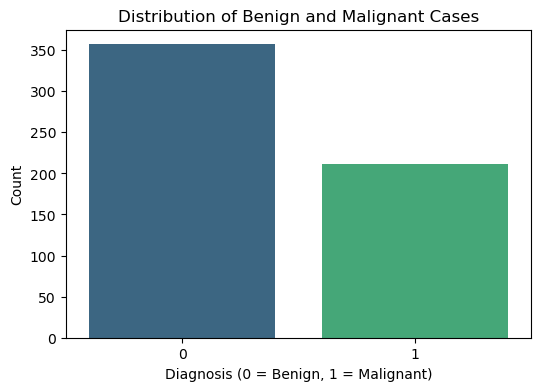

In [14]:
# Plot the distribution of benign and malignant cases
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=data_cleaned, palette='viridis')
plt.title('Distribution of Benign and Malignant Cases')
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.ylabel('Count')
plt.show()

C:\Users\aojrz\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


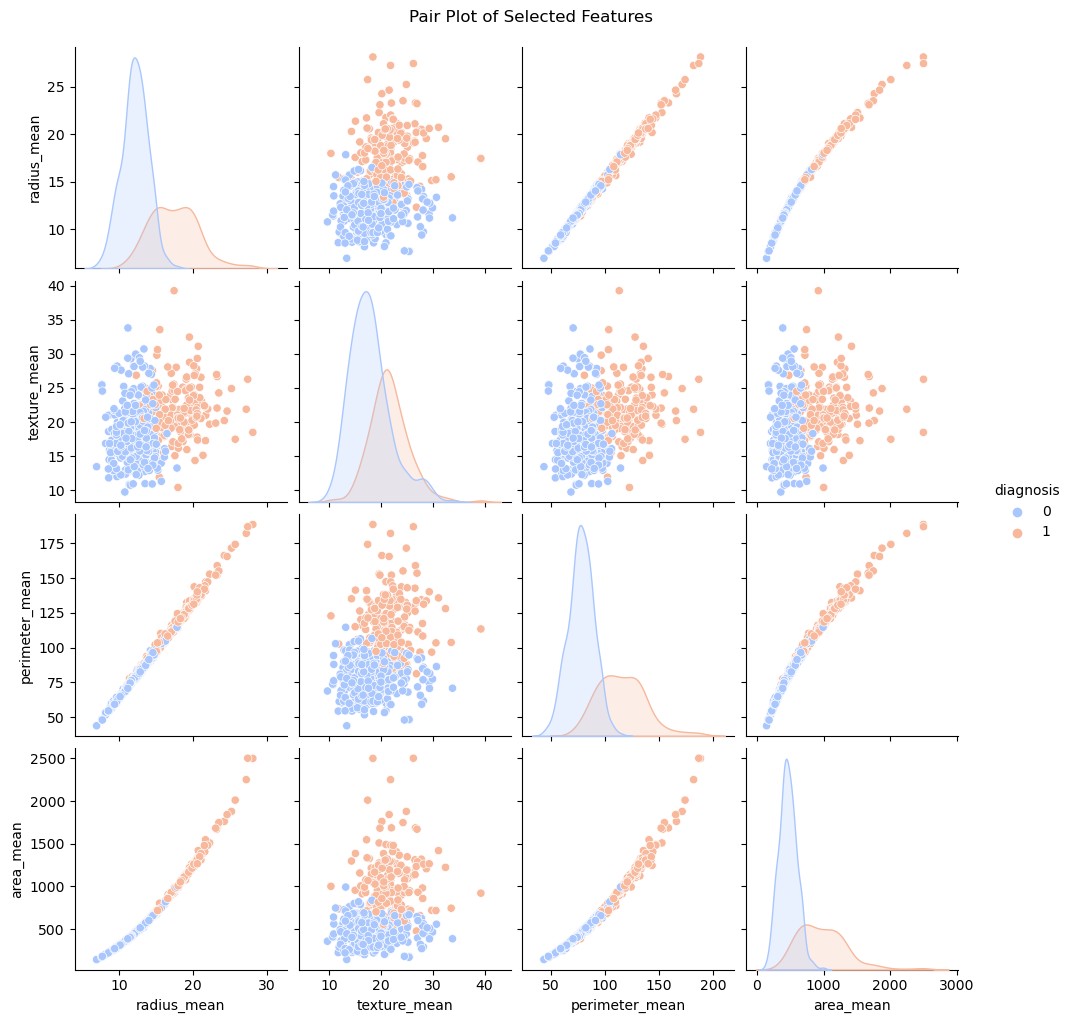

In [15]:
# Visualize pairwise relationships between selected features, colored by diagnosis
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']
sns.pairplot(data_cleaned[selected_features], hue='diagnosis', palette='coolwarm')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

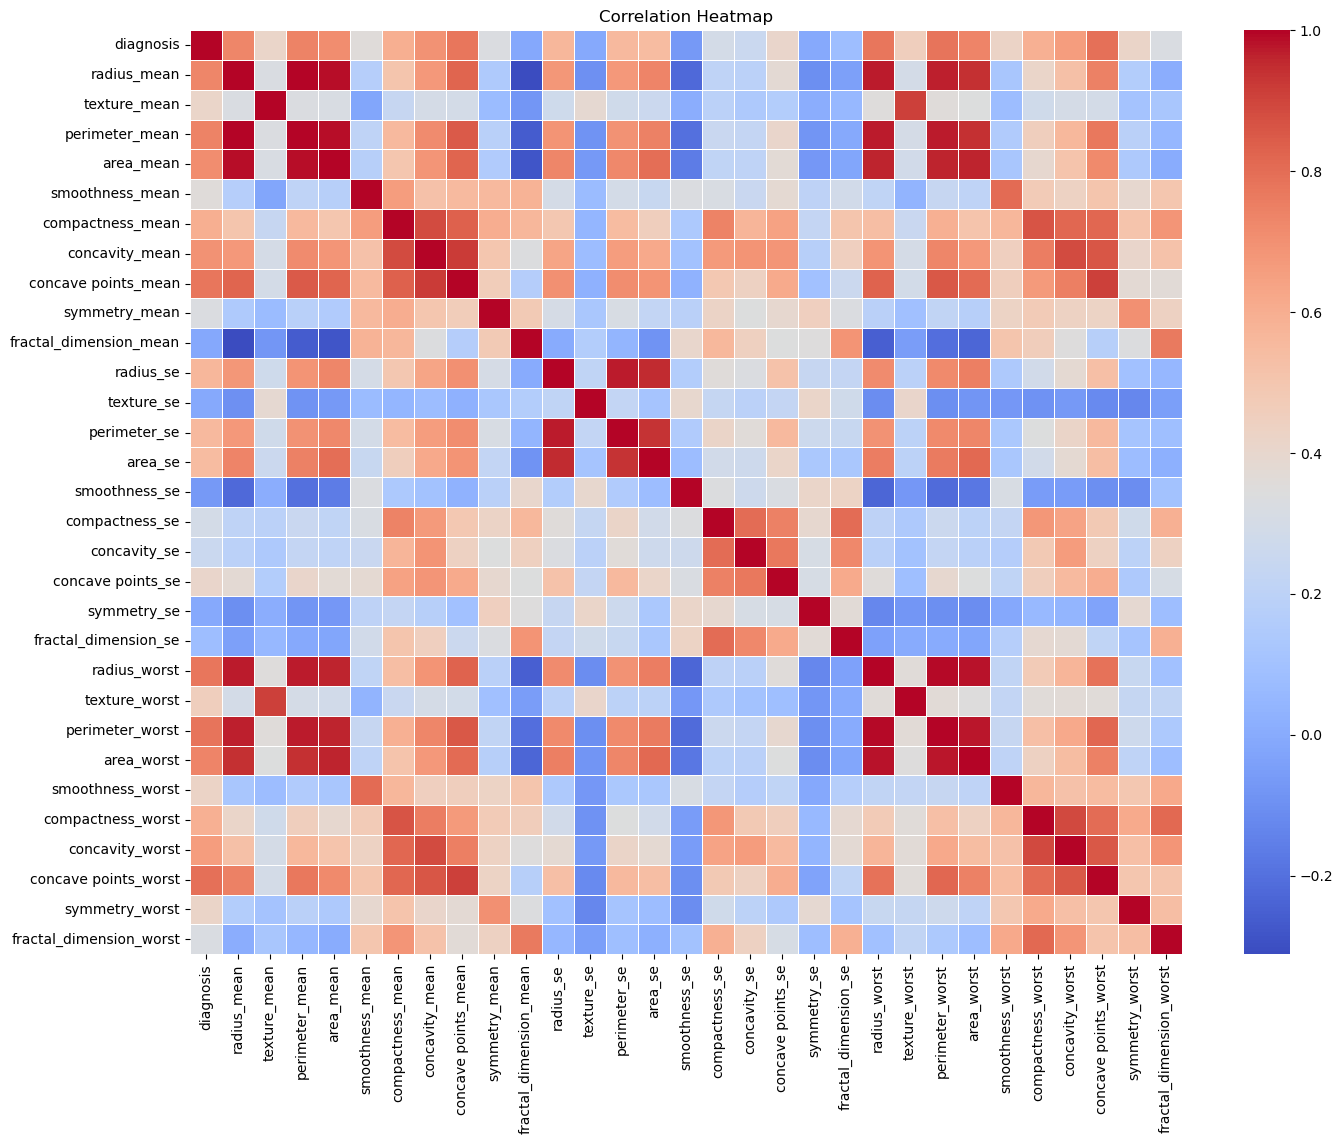

In [16]:
# Generate a heatmap of correlations between all features in the dataset
plt.figure(figsize=(16, 12))
corr_matrix = data_cleaned.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

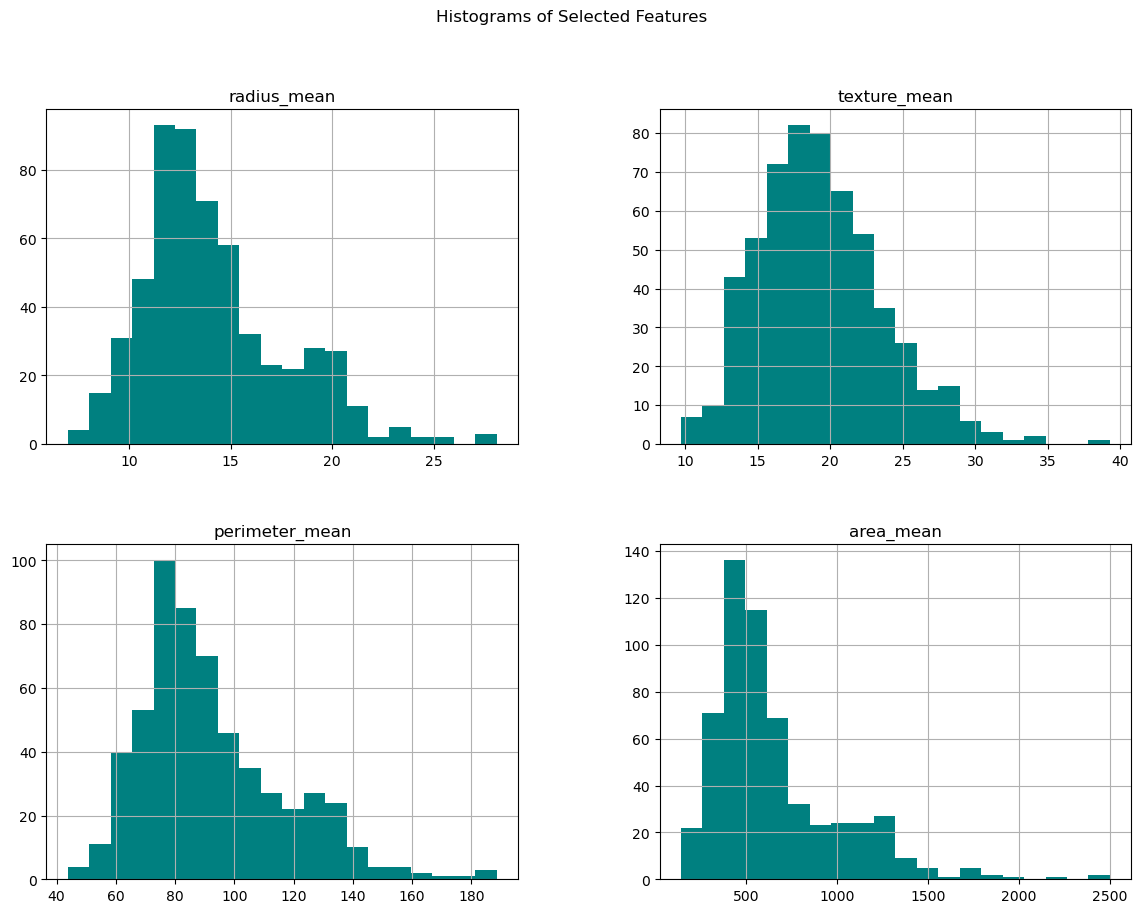

In [17]:
# Plot histograms for selected features to explore their distributions
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
data_cleaned[selected_features].hist(bins=20, figsize=(14, 10), color='teal')
plt.suptitle('Histograms of Selected Features')
plt.show()

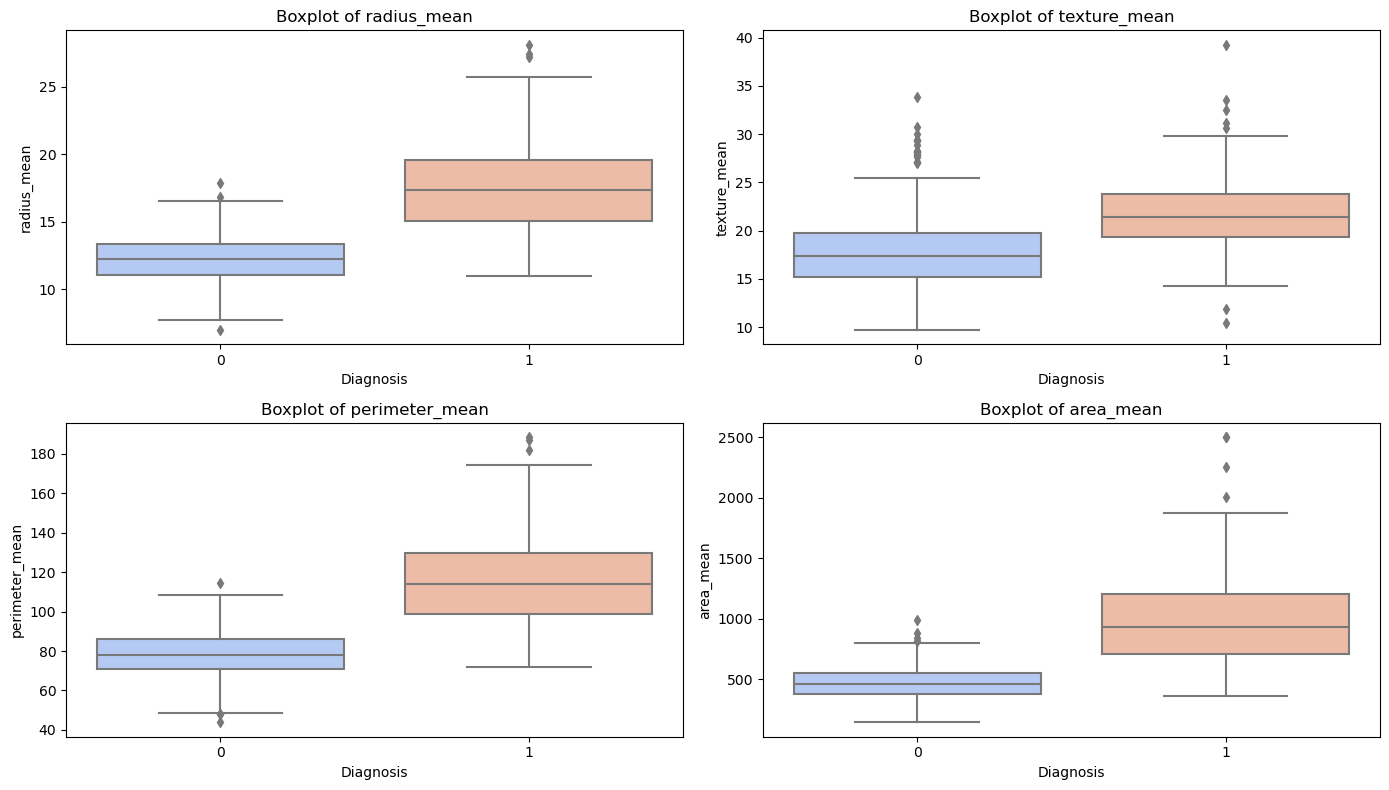

In [18]:
# Create boxplots for selected features, grouped by diagnosis
plt.figure(figsize=(14, 8))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='diagnosis', y=feature, data=data_cleaned, palette='coolwarm')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel('Diagnosis')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

### Notes
**Distribution of the Target Variable**
-  The bar plot indicates that the dataset has more benign cases (0) than malignant cases (1). This imbalance is typical in medical datasets and should be considered when building models, as it might affect the performance, especially in terms of precision and recall.

**Pair Plot of Selected Features**
-  The pair plot shows clear separation between benign and malignant cases for some features like radius_mean, perimeter_mean, and area_mean. Malignant cases generally have higher values for these features compared to benign cases. This suggests that these features will be significant in distinguishing between the two classes.
-  However, some overlap exists, especially in texture_mean, indicating that no single feature will perfectly separate the classes, emphasizing the need for a combination of features or more complex decision boundaries.

**Correlation Heatmap**
-  The heatmap reveals that some features are highly correlated with each other, such as radius_mean, perimeter_mean, and area_mean. These features are geometrically related, so their high correlation is expected.
-  Highly correlated features might be redundant for some models, and feature selection or dimensionality reduction techniques like PCA could be considered to mitigate multicollinearity.

**Distribution of Features**
-  The histograms show that most features follow a skewed distribution. For example, area_mean is right-skewed, with a long tail towards higher values, which mostly corresponds to malignant cases.
-  The skewness in these distributions suggests that applying a scaling technique, such as log transformation or standardization, might improve model performance, especially for distance-based models like k-NN.

**Box Plots to Check for Outliers**
-  The box plots reveal the presence of outliers in most features, particularly in the area_mean and perimeter_mean for malignant cases. These outliers could potentially impact the performance of the k-NN model by affecting the distance calculations.
-  It may be beneficial to investigate these outliers further to decide whether they should be treated (e.g., by capping) or if they represent true variation in the data.

# 3. Preprocessing

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

In [20]:
# Handle missing data by imputing with the mean of each column
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(data_cleaned.drop(columns=['diagnosis']))

In [21]:
# Standardize the features to have zero mean and unit variance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

In [22]:
# Check for any negative or zero values before log transformation (optional)
print("Any negative or zero values?", np.any(scaled_data <= 0))

Any negative or zero values? True


In [23]:
# Some values in the dataset are still being converted to NaN after the log transformation, likely due to negative or zero values present in the scaled data.
# The np.log1p() function is not valid for these values, which results in invalid (NaN) outputs.
# Will skip log transformation in my analysis, but you can add a small constant to counter negative/zero values using the below commented-out code

# log_transformed_data = np.log1p(scaled_data + np.abs(scaled_data.min()) + 1)

In [24]:
# Skip log transformation because negative or zero values exist; use scaled data as-is
log_transformed_data = scaled_data  # Just pass through the scaled data

In [25]:
# Apply PCA to reduce dimensionality, retaining 95% of the variance
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(log_transformed_data)

In [26]:
# Address class imbalance using SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(pca_data, data_cleaned['diagnosis'])

In [27]:
# Output shapes of the resampled data and the total variance retained by PCA
X_resampled_shape = X_resampled.shape
y_resampled_shape = y_resampled.shape
pca_explained_variance = pca.explained_variance_ratio_.sum()

In [28]:
print(f"Resampled X shape: {X_resampled_shape}")
print(f"Resampled y shape: {y_resampled_shape}")
print(f"Total Variance Retained: {pca_explained_variance:.2f}")

Resampled X shape: (714, 10)
Resampled y shape: (714,)
Total Variance Retained: 0.95


### Notes on Outputs
**Negative or Zero Values:**
-  The printout "Any negative or zero values? True" indicates that there were negative or zero values present in the scaled data before the log transformation.
-  Given that we proceeded without applying the log transformation, this decision was appropriate because applying the log transformation to these values would have resulted in NaN values, causing errors in subsequent steps.

**Resampled Data Shapes:**
-  The output Resampled X shape: (714, 10) and Resampled y shape: (714,) indicates that after applying SMOTE, the dataset now has 714 samples, balanced across both classes. The original dataset had 569 samples, so this increase reflects the synthetic examples generated for the minority class (malignant cases) to address class imbalance.
-  The dimensionality of the data has been reduced to 10 features from the original 30, which suggests that PCA was effective in reducing the feature space while retaining most of the variance.

**Total Variance Retained:**
-  The output Total Variance Retained: 0.95 confirms that PCA retained 95% of the variance in the dataset using the 10 principal components. This indicates that the dimensionality reduction was successful in preserving most of the information while reducing the complexity of the data.


### Notes on Issues Identified During EDA
**Feature Scaling:**
-  The issue with different feature scales identified during EDA has been effectively addressed by applying standardization, ensuring that all features contribute equally to the distance calculations in the k-NN model.

**Outlier Treatment:**
-  While initially considered log transformation to mitigate the effect of outliers, it was skipped due to the presence of negative or zero values. This was skipped as applying it could have caused more issues. Skipping the log transformation while using standardized data still mitigates some outlier effects because standardization reduces the influence of extreme values.

**Dimensionality Reduction:**
-  PCA successfully reduced the dimensionality from 30 features to 10, which should help prevent overfitting and make the model more efficient without losing significant information (95% of variance retained).

**Class Imbalance:**
-  The application of SMOTE successfully balanced the classes, which was a critical issue identified during EDA. This should help improve the performance of the k-NN model, particularly in predicting the minority class (malignant cases).

# 4. Data Splitting

In [29]:
# Split the resampled data into training and testing sets, maintaining class distribution with stratification
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [30]:
# Capture the shapes of the training and testing sets for verification
X_train_shape = X_train.shape
X_test_shape = X_test.shape
y_train_shape = y_train.shape
y_test_shape = y_test.shape

In [31]:
# Output the shapes of the training and testing sets
X_train_shape, X_test_shape, y_train_shape, y_test_shape

((571, 10), (143, 10), (571,), (143,))

### Notes
-  80-20 Split: The data has been split into 80% for training (571 samples) and 20% for testing (143 samples).
-  Consistency: The stratification ensured that the class distribution is consistent across both training and testing sets, which is important for maintaining the integrity of the model evaluation.

# 5. Model Building

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

In [33]:
# Initialize range of k values to test in K-Nearest Neighbors
k_values = range(1, 26)
cross_val_scores = []

# Perform cross-validation for each k to find the optimal number of neighbors
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cross_val_scores.append(scores.mean())

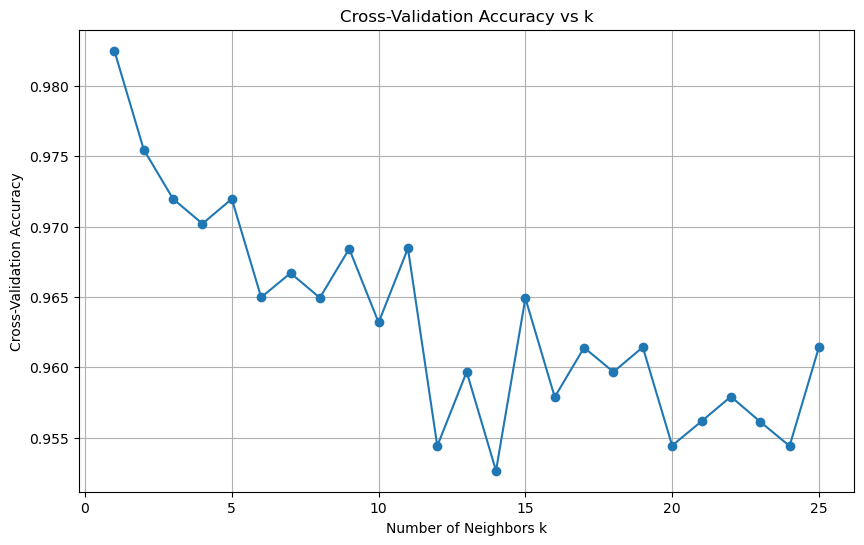

In [34]:
# Plot cross-validation accuracy against different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cross_val_scores, marker='o')
plt.title('Cross-Validation Accuracy vs k')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)
plt.show()

In [35]:
# Determine the best k based on cross-validation results
best_k = k_values[np.argmax(cross_val_scores)]
print(f"The best value of k is: {best_k}")

The best value of k is: 1


In [36]:
# Train the final KNN model using the best k
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [37]:
# Evaluate the model on the test set
test_accuracy = knn_final.score(X_test, y_test)
print(f"Test Accuracy with k={best_k}: {test_accuracy:.2f}")

Test Accuracy with k=1: 0.96


### Notes
-  k = 1: The fact that k = 1 provides the best accuracy suggests that the model is highly sensitive to the nearest neighbors, making decisions based on the closest point in the training data. While this leads to high accuracy, it can also make the model more prone to overfitting, as it might closely follow the noise in the training data.
-  High Accuracy: A test accuracy of 96% is excellent, especially given that the model has been trained on balanced data. However, you should still consider other metrics, such as precision, recall, and F1-score, especially if the model is being applied in a critical domain like medical diagnosis.

## 6. Model Evaluation

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [39]:
# Evaluate the model's accuracy on both training and test data
train_accuracy = knn_final.score(X_train, y_train)
test_accuracy = knn_final.score(X_test, y_test)

print(f"Train Accuracy with k={best_k}: {train_accuracy:.2f}")
print(f"Test Accuracy with k={best_k}: {test_accuracy:.2f}")

Train Accuracy with k=1: 1.00
Test Accuracy with k=1: 0.96


In [40]:
# Predict the labels for the test set
y_pred = knn_final.predict(X_test)

In [41]:
# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[70  2]
 [ 4 67]]


In [42]:
# Generate and display the classification report, which includes precision, recall, and F1-score
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.97      0.94      0.96        71

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [43]:
# Calculate and print the overall accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"\nOverall Accuracy: {accuracy:.2f}")


Overall Accuracy: 0.96


### Notes on Outputs
**Train vs. Test Accuracy:**
- Train Accuracy with k=1: 1.00: The model perfectly classifies all training samples, which is expected for k=1 since the model is essentially memorizing the training data. This is a sign of potential overfitting.
- Test Accuracy with k=1: 0.96: The model performs very well on the test data, with a high accuracy of 96%. This indicates that despite the overfitting potential, the model generalizes well to unseen data in this case.

**Confusion Matrix:**
-  True Positives (67): The model correctly identified 67 malignant cases.
-  True Negatives (70): The model correctly identified 70 benign cases.
-  False Positives (2): The model incorrectly classified 2 benign cases as malignant.
-  False Negatives (4): The model incorrectly classified 4 malignant cases as benign.

**Classification Report:**
-  Precision:
    -  Class 0 (Benign): 0.95
    -  Class 1 (Malignant): 0.97
    -  The high precision values indicate that the model is very good at not misclassifying instances as positive (malignant) when they are not, especially for the malignant class.

-  Recall:
    -  Class 0 (Benign): 0.97
    -  Class 1 (Malignant): 0.94
    -  The recall is also high for both classes, indicating that the model is effective at identifying most of the actual positive cases (both benign and malignant).

-  F1-Score:
    -  Both classes have an F1-score of 0.96, which reflects a good balance between precision and recall.
    
**Overall Accuracy:**
-  The overall accuracy of 96% confirms that the model is performing exceptionally well on the test set.

### Notes on the Model
**Overfitting Concerns:**
-  The perfect training accuracy with k=1 does suggest overfitting, but given that the test accuracy remains very high, this isn't a significant issue for this specific dataset. However, in a real-world scenario, overfitting could lead to poor generalization on entirely new data.

**Balanced Performance:** 
-  The model shows a balanced performance across both classes, which is critical in medical diagnostics where both false positives and false negatives have serious implications.

**Final Recommendation:**
-  While k=1 works well in this case, if there are concerns about overfitting in other datasets, you might consider using a slightly higher k (e.g., k=3 or k=5) for more robustness. This might slightly reduce accuracy but could improve the model's generalization.
-  Given the high performance metrics, this model can be considered a strong candidate for predicting whether a tumor is benign or malignant in this dataset.

# 7. Conclusion 

## Model Selection
**Selected Model:** The k-NN model with k=1 has been identified as the best-performing model for this dataset, achieving a test accuracy of 96%. Despite potential concerns of overfitting, the model generalizes well on the test data, which suggests that it can effectively distinguish between benign and malignant tumors in this dataset.

##  Practical Implications
**Use in Medical Diagnosis:** The model's high precision and recall make it a strong candidate for deployment in a medical diagnostic setting where distinguishing between benign and malignant cases is critical. The low number of false negatives (4) indicates that the model is reliable in minimizing the risk of missing malignant cases.

**Potential Overfitting:** While the model performs well on this dataset, caution should be exercised if deploying the model in a different or more varied dataset. The perfect training accuracy suggests that the model might be highly tuned to this particular dataset.

##  Considerations for Further Development
**Explore Slightly Higher k Values:** In practice, using k=3 or k=5 might provide more robustness against overfitting, even if it comes with a slight decrease in accuracy. This could be particularly useful if the model were to be applied to a broader population.

**Cross-Validation on Other Datasets:** Before deployment, further validation on additional datasets with varying characteristics is recommended to ensure the model's generalizability.